In [9]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import scipy.io
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
# plt.style.use('seaborn-notebook')
plt.style.use('ggplot')

## Data

400


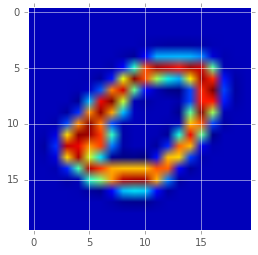

In [32]:
data = scipy.io.loadmat('ex3data1.mat') # training data stored in arrays X, y
X = data['X']
y = data['y']
print len(X[0])
img = np.reshape(X[0],(20,20))
plt.imshow(img)

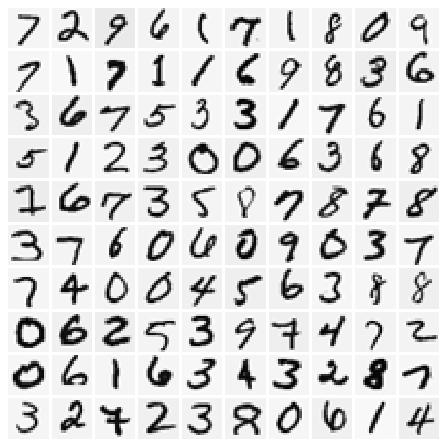

In [3]:
def display_data(X):
    size = math.sqrt(len(X))
    fig = plt.figure(figsize=(6,6))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(len(X)):
        ax = fig.add_subplot(size, size, i+1, xticks=[],yticks=[])
        ax.imshow(
            np.transpose(np.reshape(X[i],(20,20))),
            cmap=plt.cm.binary,
            interpolation='nearest'
        )

# # Randomly select 100 data points to display
rand_indices = np.random.permutation(range(len(X)))
sel = X[rand_indices[0:100], :]
display_data(sel)

In [4]:
# 3 layers: I-H-O, 400 +1 units@input, 25 +1 units hidden layer, 10 units output
# Load the weights into variables Theta1 and Theta2
data = scipy.io.loadmat('ex3weights.mat')
Theta1 = data['Theta1']
Theta2 = data['Theta2']
print "size theta1, theta2:", Theta1.shape, Theta2.shape
# X = np.column_stack((np.ones(len(X)),X))
print "size X, y: ", X.shape, y.shape

size theta1, theta2: (25, 401) (10, 26)
size X, y:  (5000, 400) (5000, 1)


## Feedforward propagation and prediction from trained network

In [53]:
def sigmoid(z):
    return 1/(1 + np.exp(-np.array(z)))

print sigmoid([4.6,0])

def predict(theta1, theta2, X):
    # 5000 * 401
    X = np.column_stack((np.ones(len(X)),X))
#     print X.shape
    
    # (5000 * 25) = (5000 * 401) (401 * 25)
    z2 = np.dot(X,np.transpose(Theta1))
#     print z2.shape
    
    # (5000 * 26) = (5000 * 25) + append 1
    a2 = np.column_stack((np.ones(len(z2)),sigmoid(z2)))
#     print a2.shape
                         
    z3 = np.dot(a2, np.transpose(theta2))
    a3 = sigmoid(z3)
    return np.argmax(a3,axis=1)+1


# pred = predict(Theta1, Theta2, np.matrix(X[0]))
# print "predict 1 input: ", pred
pred = predict(Theta1, Theta2, X)
print "predict all inputs: ", pred
print np.squeeze(y)

print 'Training Set Accuracy: %f\n', np.mean(np.double(pred == np.squeeze(y))) * 100

[ 0.9900482  0.5      ]
predict all inputs:  [10 10 10 ...,  9  9  9]
[10 10 10 ...,  9  9  9]
Training Set Accuracy: %f
97.52


Displaying Example Image
Neural Network Prediction: 4 (digit 4)

Displaying Example Image
Neural Network Prediction: 2 (digit 2)

Displaying Example Image
Neural Network Prediction: 10 (digit 0)

Displaying Example Image
Neural Network Prediction: 4 (digit 4)



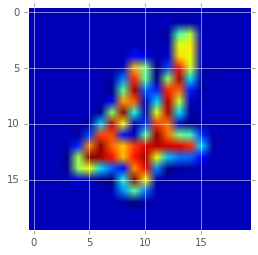

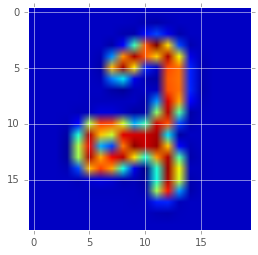

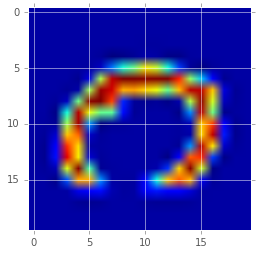

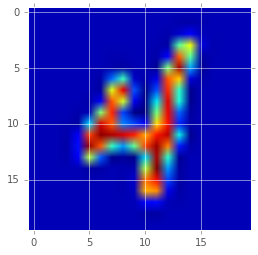

In [6]:
#  Randomly permute examples
rp = np.random.permutation(range(len(X)))

for i in range(4):
    # Display
    X2 = X[rp[i],:]
    print 'Displaying Example Image'
    X2 = np.matrix(X[rp[i]])
    plt.figure()
    plt.imshow(np.transpose(np.reshape(X2,(20,20))))
    pred = predict(Theta1, Theta2, X2)
    pred = np.squeeze(pred)
    print 'Neural Network Prediction: %d (digit %d)\n' % (pred, np.mod(pred, 10))

## Cost function

In [59]:
def cost_function(nn_params, X, y):
    theta1 = nn_params[0]
    theta2 = nn_params[1]
    J = 0
    
    for i in range(len(X)):
        a0 = np.append(1,X[i]) # 1*401
        z2 = np.dot(a0,np.transpose(Theta1)) # 1 * 25
        a2 = np.append(1,sigmoid(z2)) # 1 * 26
        z3 = np.dot(a2, np.transpose(theta2)) # 1 * 10
        a3 = sigmoid(z3) # 1 * 10 
        prediction = a3
        J += -np.dot(y[i], np.transpose(np.log(prediction)))-np.dot((1-y[i]), np.transpose(np.log(1-prediction)))
    J = J/len(X)
    return J

data = scipy.io.loadmat('ex4weights.mat')
Theta1 = data['Theta1']
Theta2 = data['Theta2']
print "theta1, theta2:",Theta1.shape, Theta2.shape
print "X:", X.shape
print "y:", y.shape
# y is a vector of unit vector. convert to array.
y_ = [x[0] for x in y]
# one hot encoding of categorical variables
encoded = pd.get_dummies(y_)
cost_function([Theta1, Theta2], X, encoded.values)

theta1, theta2: (25, 401) (10, 26)
X: (5000, 400)
y: (5000, 1)


0.28762916516131876

## Backpropagation

In [56]:
def sigmoid_gradient(z):
    return sigmoid(z)*(1-sigmoid(z))

print sigmoid_gradient([[0,1],[1,0]])

[[ 0.25        0.19661193]
 [ 0.19661193  0.25      ]]
